## self.Q dictionary

In [21]:
self_Q = {
 ('left', 'red', None, 'right', None, '30'): 
    {None :     3, 
    'forward' : 4, 
    'left' :    3, 
    'right' :   4},
    
 ('left', 'green', None, 'left', None, '20'): 
    {None :     10, 
    'forward' : 11, 
    'left' :    12, 
    'right' :   13},
    
 ('up', 'red', None, 'right', None, '10'): 
    {None :      0, 
     'forward' : 0, 
     'left' :    0, 
     'right' :   0}
}

In [23]:
import pandas as pd
pd.DataFrame.from_dict(self_Q)

left          up
        green   red   red
          NaN   NaN   NaN
         left right right
          NaN   NaN   NaN
           20    30    10
NaN        10     3     0
forward    11     4     0
left       12     3     0
right      13     4     0

In [167]:
import numpy as np
import random
self_Q = dict()
alpha = 0.5

## state =self.build ()

In [180]:
waypoint = 'left'
inputs = {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}
#inputs = inputs.values()
inp1, inp2, inp3, inp4 = inputs.values()
deadline = '30'
state = (waypoint,inp1, inp2, inp3, inp4, deadline);
print (state)
pd.DataFrame.from_dict(self_Q)

('left', 'green', None, 'right', None, '30')


,left
,red
,NaN
,right
,NaN
,30
NaN,1.0
forward,0.0
left,0.0
right,0.0


##  self.createQ (state)

In [181]:
if state not in self_Q: self_Q[state] = {None : 0,'forward' : 0,'left' : 0,'right' : 0}
self_Q
self_Q[state][None]
pd.DataFrame.from_dict(self_Q)

left      
        green   red
          NaN   NaN
        right right
          NaN   NaN
           30    30
NaN         0   1.0
forward     0   0.0
left        0   0.0
right       0   0.0

## action = self.choose_action (state)

In [185]:
actions_high_Qvalue = []
              #print(self.Q[state])
for i_action in self_Q[state]:
    if self_Q[state].get(i_action) == np.max(self_Q[state].values()):
        actions_high_Qvalue.append(i_action)
        #print(actions_high_Qvalue)
action = random.choice(actions_high_Qvalue)
print(actions_high_Qvalue)
print (action)

['forward', 'right', None, 'left']
forward


## reward = self.env.act(self.action)

In [186]:
if action == None: reward = 1 
elif action == 'forward': reward = 2
elif action == 'left': reward = 3
elif action == 'right': reward = 4
print(action,reward)

('forward', 2)


## self.learn (state, action, reward) 

In [187]:
print (self_Q[state][action])
self_Q[state][action] += alpha*reward
print (self_Q[state][action])
print (pd.DataFrame.from_dict(self_Q))

0
1.0
         left      
        green   red
          NaN   NaN
        right right
          NaN   NaN
           30    30
NaN       0.0   1.0
forward   1.0   0.0
left      0.0   0.0
right     0.0   0.0


In [204]:
epsilon = 1

In [220]:
epsilon = 1
tolerance = 0.05
for iteration in range(25):
    print(iteration)
    print(epsilon)
    epsilon -= 0.05
    if epsilon < 0: epsilon = 0
    print('calculated epsilon:', epsilon)
    action = np.random.choice(['random action','highest Q-value'], p = [epsilon, 1 - epsilon])
    print (action)
    

0
1
('calculated epsilon:', 0.95)
random action
1
0.95
('calculated epsilon:', 0.8999999999999999)
highest Q-value
2
0.9
('calculated epsilon:', 0.8499999999999999)
random action
3
0.85
('calculated epsilon:', 0.7999999999999998)
random action
4
0.8
('calculated epsilon:', 0.7499999999999998)
random action
5
0.75
('calculated epsilon:', 0.6999999999999997)
random action
6
0.7
('calculated epsilon:', 0.6499999999999997)
highest Q-value
7
0.65
('calculated epsilon:', 0.5999999999999996)
random action
8
0.6
('calculated epsilon:', 0.5499999999999996)
random action
9
0.55
('calculated epsilon:', 0.4999999999999996)
random action
10
0.5
('calculated epsilon:', 0.4499999999999996)
random action
11
0.45
('calculated epsilon:', 0.39999999999999963)
highest Q-value
12
0.4
('calculated epsilon:', 0.34999999999999964)
highest Q-value
13
0.35
('calculated epsilon:', 0.29999999999999966)
highest Q-value
14
0.3
('calculated epsilon:', 0.24999999999999967)
highest Q-value
15
0.25
('calculated epsilon

## Improve the Q-Learning Driving Agent - Decaying function parameters.


In [3]:
def epsilon_function(function, trials, epsilon, tolerance = 0, a = 0):
    if function == 'linear_negative':
        value = epsilon[len(epsilon)-1] - tolerance

    elif function == 'a^t':
        value = math.pow(a, trials [len(trials)-1])

    elif function == '1/t^2':
        value = 1/math.pow(trials [len(trials)-1],2)
        
    elif function == 'e^-at':
        value = math.exp(-a*trials [len(trials)-1])
    
    elif function == 'cos(at)':
        #print(a*trials [len(trials)-1])
        value = math.cos(a*trials [len(trials)-1])
    
    return value

In [14]:
import math
import numpy as np

function = 'cos(at)'
tolerance = .01
a= 0.004
trials = [1]
epsilon = [1]

while epsilon[len(epsilon) -1 ] > tolerance:
    trials = np.append(trials, trials[len(trials) -1] + 1 )
    epsilon = np.append(epsilon, epsilon_function(function, trials, epsilon, tolerance, a))  

print(epsilon)
print(trials)
#math.pow(.5, 0)

[ 1.          0.999968    0.999928    0.999872    0.99980001  0.99971201
  0.99960803  0.99948804  0.99935207  0.99920011  0.99903216  0.99884822
  0.9986483   0.99843241  0.99820054  0.9979527   0.99768889  0.99740912
  0.99711339  0.99680171  0.99647407  0.9961305   0.99577098  0.99539554
  0.99500417  0.99459687  0.99417367  0.99373455  0.99327954  0.99280864
  0.99232185  0.99181918  0.99130064  0.99076625  0.990216    0.9896499
  0.98906798  0.98847022  0.98785666  0.98722728  0.98658211  0.98592116
  0.98524443  0.98455194  0.98384369  0.98311971  0.98237999  0.98162455
  0.98085341  0.98006658  0.97926406  0.97844588  0.97761204  0.97676256
  0.97589745  0.97501673  0.9741204   0.97320849  0.97228101  0.97133797
  0.9703794   0.96940529  0.96841568  0.96741057  0.96638998  0.96535393
  0.96430243  0.96323551  0.96215317  0.96105544  0.95994233  0.95881386
  0.95767005  0.95651092  0.95533649  0.95414677  0.95294178  0.95172155
  0.95048609  0.94923542  0.94796956  0.94668854  0.

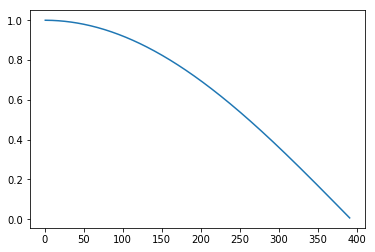

In [6]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot (trials, epsilon)
plt.show()